In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns

In [ ]:
### Importing the Dataset

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
#Intially there are 43 columns which are categorical values,35 integer and float 3 
#this data will help us to study the categorical columns which are essential and not essential ahead

In [4]:
df.dtypes.value_counts()


object     43
int64      35
float64     3
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']


In [7]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']


0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

In [ ]:
#find the columns which consist of null data, as many a times with higher insufficient data can give us false results and consume
#we can find the columns which have highest number of null values so we can remove them.

In [8]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

Text(0.5, 1.0, 'Quantifying missing data')

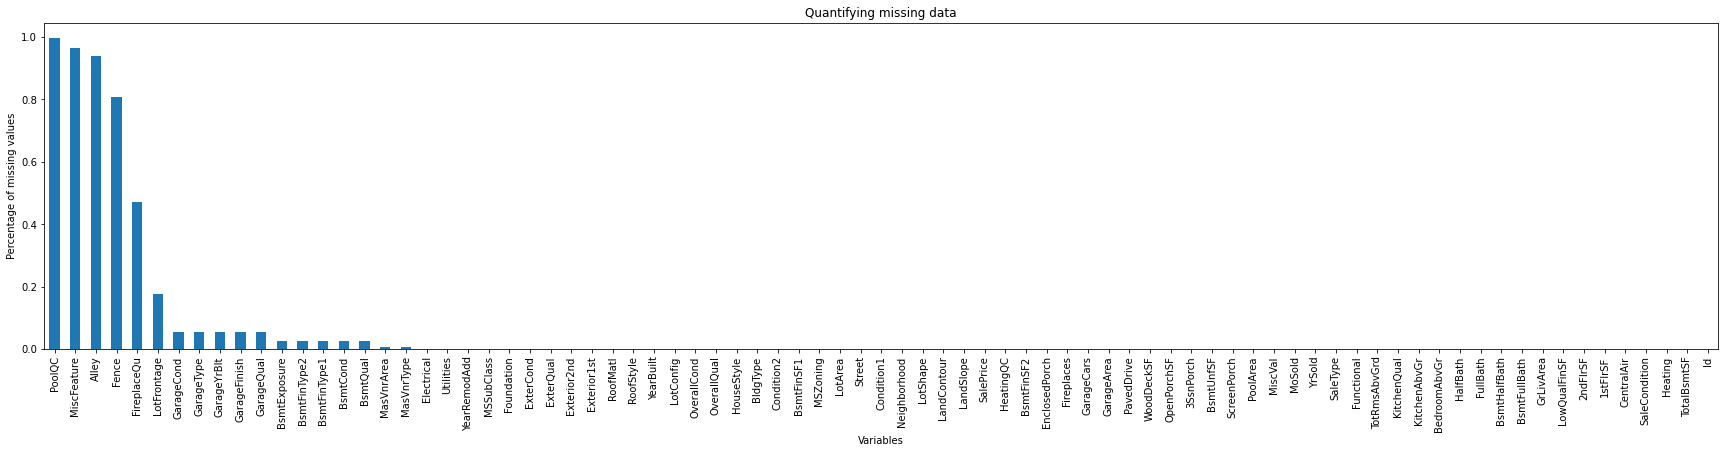

In [9]:
df.isnull().mean().sort_values(ascending=False).plot.bar(figsize=(30,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [ ]:
#we find the percent of each columns and plotted them in descending values to find the highest insufficient data and from the fig it was found 
#columns PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage' have highest insufficent data.

In [10]:
def drop_columns(data):
    drop_columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']
    return data.drop(drop_columns,1)
data=drop_columns(df)

In [ ]:
#we still have null data in some columns but it is small percent as we can GarageType is only 5% with null values
#we use mode for object data types which replaces empty values with the most frequent value out if n values
# and for numerical we replace it with mean.

In [11]:
def full_nan_by_mean_mod(data):
    nan_columns=data.columns[data.isnull().any()]
    for i in nan_columns:
        if(data[i].dtypes=="object"):
            data[i]=data[i].fillna(data[i].mode()[0])
        else:
            data[i]=data[i].fillna(data[i].mean())
    return data
full_nan_by_mean_mod(data)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
#now if we check the data is cleanedd it has no null values

In [12]:
data.isnull().sum().sort_values(ascending=False)

SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Id              0
Length: 75, dtype: int64

In [13]:
dropped_columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']
final_list = list(set(qualitative) - set(dropped_columns))


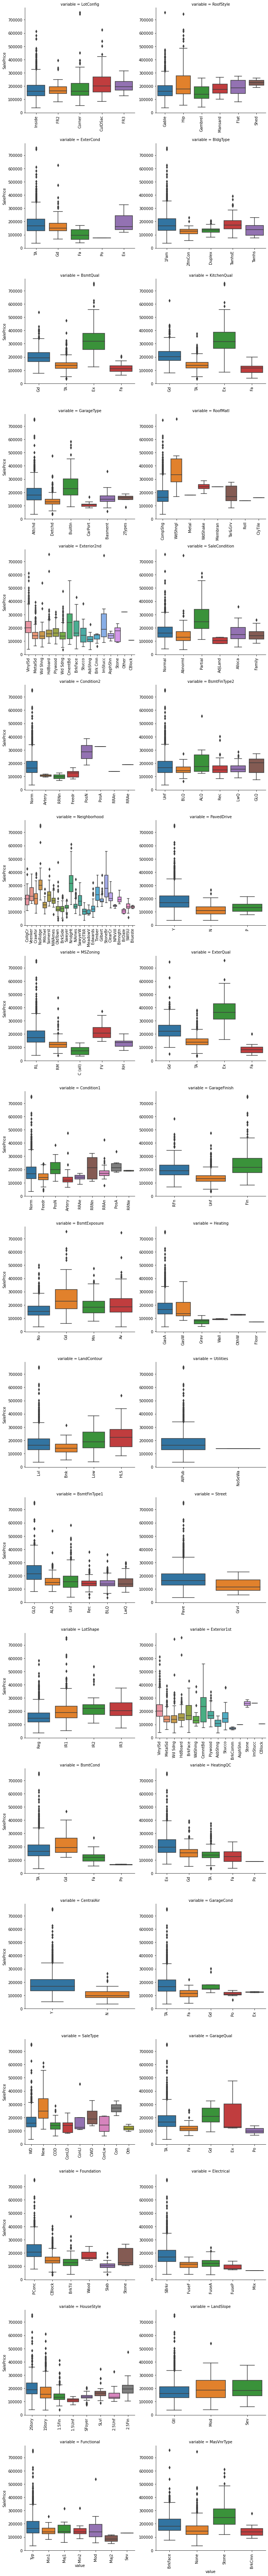

In [14]:
for c in final_list:
    
    data[c] = data[c].astype('category')
    if data[c].isnull().any():
        data[c] = data[c].cat.add_categories(['MISSING'])
        data[c] = data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(data, id_vars=['SalePrice'], value_vars=final_list)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

In [ ]:
#'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. 
#In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
#OverallQual shows high variability with salesprice, 
#where the box plot shows how sales prices increase with the overall quality.

In [ ]:
#next task to find the columns which impact the salesprice the most, we have categorical data, firstly we need to encode it and 

Text(0.5, 1.0, 'Cardinality')

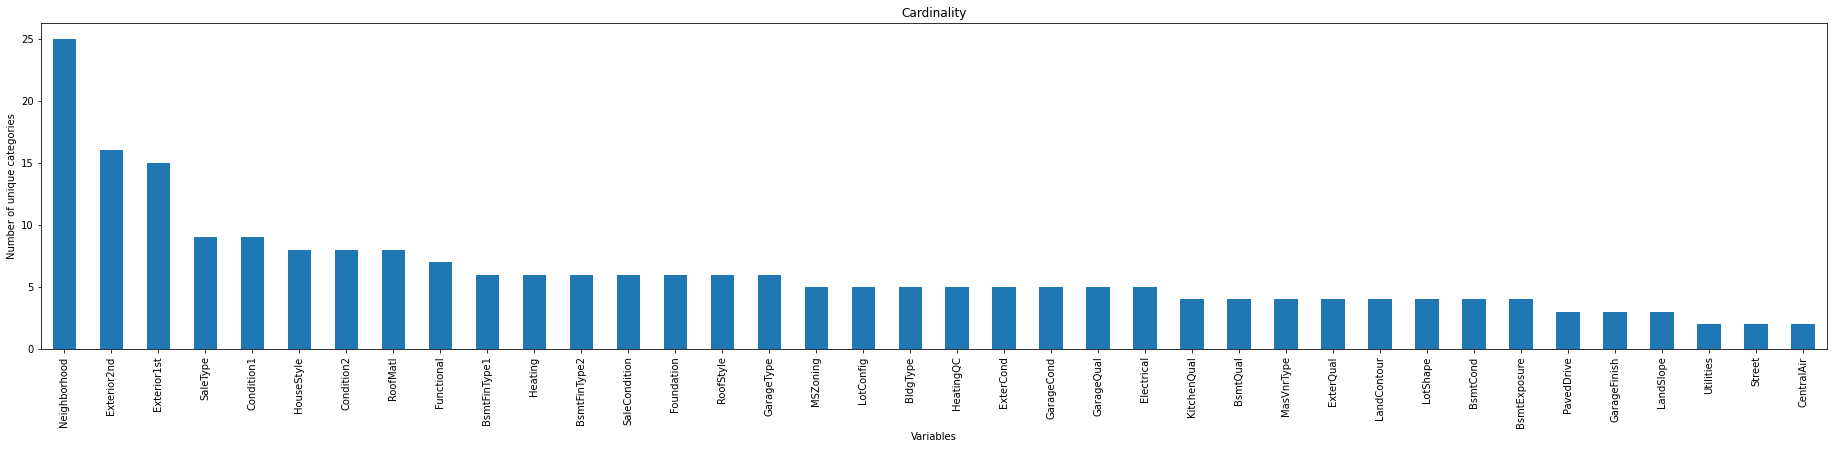

In [15]:
df[final_list].nunique().sort_values(ascending=False).plot.bar(figsize=(32,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [16]:
cardinality = df[final_list].nunique().sort_values(ascending=False)
cardinality.mean()

6.157894736842105

In [ ]:
#the purpose of finding cardinality to select suitable categorical encoding techniques, since our categorical fatures 
#have highest cardinality of 25 and lowest of 2
#mean of distinct cardinality features is between 6 to 7

In [17]:
data.corrwith(df["SalePrice"],method= "spearman").sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
GarageArea      0.649379
FullBath        0.635957
TotalBsmtSF     0.602725
1stFlrSF        0.575408
YearRemodAdd    0.571159
dtype: float64

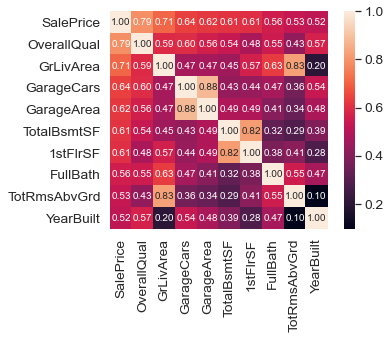

In [18]:
# saleprice correlation matrix
corrmat = data.corr()

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index   # nlargest : pick the most powerfull correlation
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [23]:
data.iloc[:,:-1].values

array([[1, 60, 'RL', ..., 2008, 'WD', 'Normal'],
       [2, 20, 'RL', ..., 2007, 'WD', 'Normal'],
       [3, 60, 'RL', ..., 2008, 'WD', 'Normal'],
       ...,
       [1458, 70, 'RL', ..., 2010, 'WD', 'Normal'],
       [1459, 20, 'RL', ..., 2010, 'WD', 'Normal'],
       [1460, 20, 'RL', ..., 2008, 'WD', 'Normal']], dtype=object)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
#Scatterplot can be used to detect outliers and cross check our correlation obtained in the abpve graph.
#sometimes due to outliers the correlation is affected


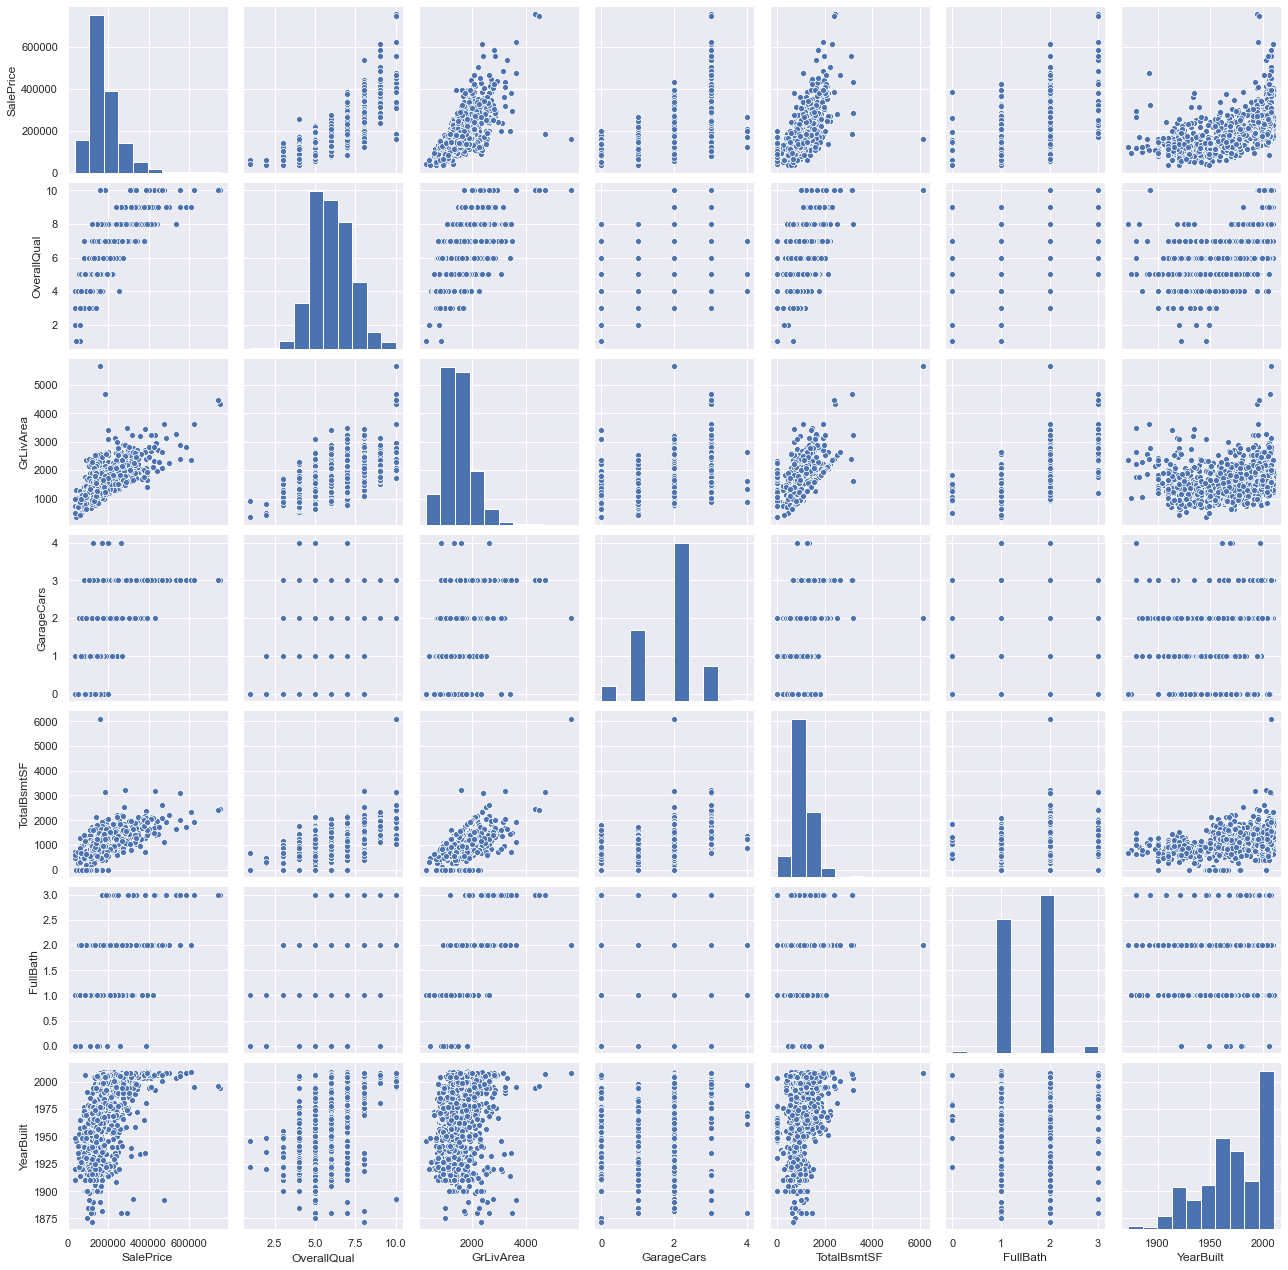

In [24]:
#scatterplot
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(data[cols],height=2.5)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


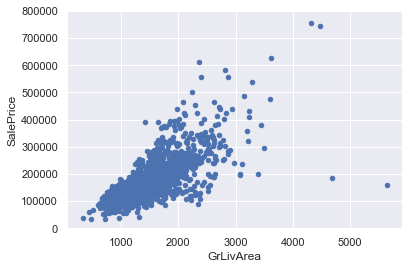

In [25]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'

data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [26]:
data[data['GrLivArea']>5000]
data[data['GrLivArea']>4000]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [27]:
data = data.drop(data[data['Id'] == 1299].index)
data = data.drop(data[data['Id'] == 524].index)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


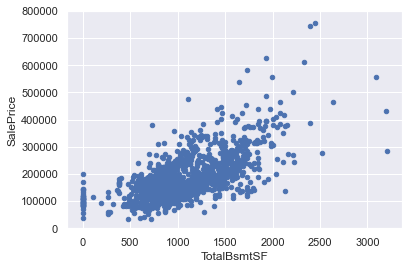

In [28]:
var = 'TotalBsmtSF'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [29]:
data[data['TotalBsmtSF']>6000]


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [30]:
for i in final_list:
    x = data[i].value_counts()
    print("Column name is:",i,"and it value is:",x)

Column name is: LotConfig and it value is: Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Column name is: RoofStyle and it value is: Gable      1141
Hip         284
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
Column name is: ExterCond and it value is: TA    1280
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
Column name is: BldgType and it value is: 1Fam      1218
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
Column name is: BsmtQual and it value is: TA    686
Gd    618
Ex    119
Fa     35
Name: BsmtQual, dtype: int64
Column name is: KitchenQual and it value is: TA    735
Gd    586
Ex     98
Fa     39
Name: KitchenQual, dtype: int64
Column name is: GarageType and it value is: Attchd     950
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Column name

In [31]:
data  = pd.get_dummies(data, columns=final_list)

In [ ]:
z = data.corrwith(data['SalePrice'], method= "spearman").sort_values(ascending = False).head(10)
z

In [ ]:
from scipy.stats import norm
# histogram and normal probability plot 
sns.distplot(data['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

In [ ]:
#we see right skewness in our saleprice data

In [ ]:
from scipy.stats import norm
# histogram and normal probability plot 
sns.distplot(data['GrLivArea'],fit=norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)
data['GrLivArea'] = np.log(data['GrLivArea'])
# histogram and normal probability plot 
sns.distplot(data['GrLivArea'],fit=norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

In [ ]:
data['SalePrice'] = np.log(data['SalePrice'])
# histogram and normal probability plot 
sns.distplot(data['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

In [ ]:
data.corrwith(data['SalePrice'],method= "spearman").sort_values(ascending = False).head(10)

In [ ]:
y = data['SalePrice']

In [ ]:
X = data.drop('SalePrice',axis=1)

In [ ]:
X